# Homework 5

Alright Nelson, we are back! Image processeing and reducing dimensionality. Although I know very little about these things I'm giving a shout out to my mentor Tyler for giving me a lot of structural code to use on my own data set. He's a hero.

We are going to just start by importing our data as well as some of the functions we will be using

In [3]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255
y = mnist.target


C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

Question 1. part a)
Below we use PCA to reduce our model to only 20 dimensions. The reason why I chose this number is because in the graph farther below it seems like there is an elbow in my curve where the rate of explained variance compared to number of dimensions is starting to lower. With 20 dimensions we are in a nice, effcient spot.

In [6]:
pca = PCA(n_components=20)
X_2dim = pca.fit_transform(X)
X_2dim.shape

(70000, 20)

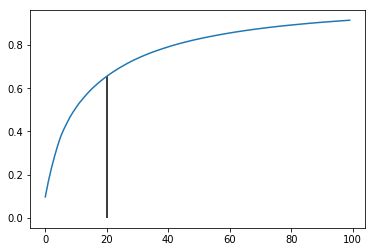

In [7]:
pca = PCA(n_components=100)
X_2dim = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)

Question 1. part b)
Here we plot our first two components.

Its super cool because we have regions of similar color. On the right hand side we have  really thick purple, up in the top right we have a big splotch of yellow, and down in the bottom we have our blues. My assumption about this is that these are clusters of images with the same number on them. Our graph is also gorgeous

Text(0.5,1,'First 2 Components')

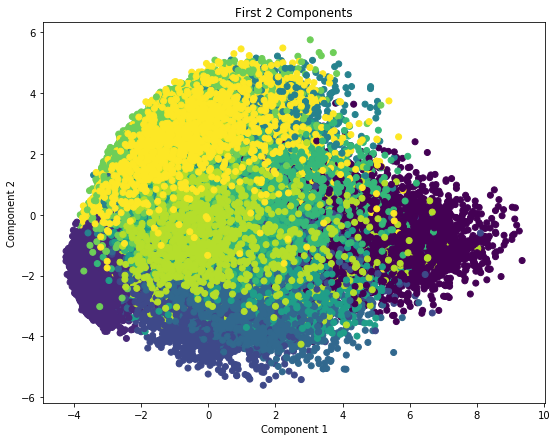

In [8]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(X)
f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First 2 Components')

Question 1. part c)
We use PCA as a dimension reduction tool that can take a large set of features and turn them into a small set of features that still has a majority of the information. In our NCAA bracket predicter it would've been helpful if we included ALL regulare season statistics because there is going to be some auto correlation throughout them. One of the draw backs is that you are giving up information each time you drop to a lower dimension. A good visual exampls is that if you have a cube and drop it to the second dimension, you can still see that a cube has the base of a square, but we now don't know how tall the shape was. We might assume it's a rectangular prism instead of a cube. We lost information

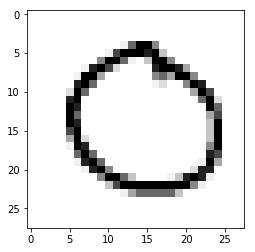

In [9]:
plt.imshow(X[7].reshape((28,28)), cmap = 'Greys')

In [10]:
data_pca[7].shape

(2,)

In [12]:
plt.imshow(data_pca[7].reshape((2,0)), cmap = 'Greys')

ValueError: cannot reshape array of size 2 into shape (2,0)

# T-SNE

In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [15]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 5.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.708928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.403526
[t-SNE] KL divergence after 1000 iterations: 1.643620


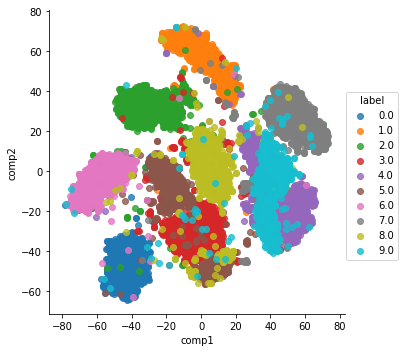

In [16]:
import seaborn as sns
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Yup. That's Tyler's baby. But it looks SO dang good I couldn't not use it. Question 2. part a) This plot is different because it seems much more segregated. In my above picture. its a swirl of color and lots of things over lap, but this flattened T-SNE has very specific clusters for each number. I also think it is super cool once you start looking at which numbers are together. For example, we have our 9's in light blue that are surrounded by 4's on both sides. TOTALLY makes sense since a 9 and a 4 are similar in shape. It also seems that, for the most part, the random off-colored data points are also clustered. For example, most of our 3's that aren't near other 3's are over by the 2's, not the 9's.

Let's change perplexity

In [17]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.017s...
[t-SNE] Computed neighbors for 10000 samples in 4.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.178893
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.697357
[t-SNE] KL divergence after 1000 iterations: 1.887074


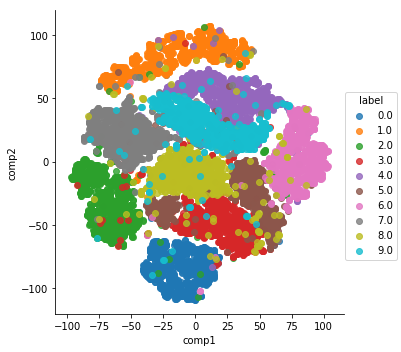

In [18]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

^^^ What in the world. I changed the perplexity from 50 to 10 and now I have this translated image. All the clusters still exist, but they are just in different spots! I do not understand what is causing that at all. I would like to note, however, that this has a definite segregation of 9's and 4's into two clusters, where as before we had two different piles of 4's. Also the clusters seem closer together with less white space like some beautiful pangea of numbers.

In [19]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...
[t-SNE] Computed neighbors for 10000 samples in 5.706s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.706120
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.580978
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043

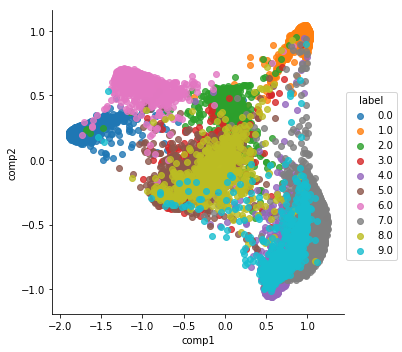

In [20]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Changing our iterations from 1000 to 250 we get this mess. It seems it still was working on segregation, but it just... didn't finish! Underneath our 9's it seems all of our 4's are hiding. With more iterations it differentiates the two. Also, everything seems skewed into an abnormal shape where as before we had a generally circular mass. That is super cool to see the difference of these three things.

# K-means clustering

In [21]:
from sklearn.cluster import KMeans


I chose my K to be 10 because I know I have 10 different numbers! At first I put 9 because I thought 'well, the highest number is 9..' and then I realized that our dataset includes 0. 10 seems good. I know Tyler has a graph that shows which K's are better, but it seemed like an obvious choice to just choose 10 because I want 10 distinct groups anyway.

In [23]:
kmeans = KMeans(n_clusters=9, n_init=150, n_jobs=-1)
kmeans.fit(X)
sk_clusters = kmeans.predict(X,y)

plt.scatter(X,y, c=sk_clusters)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.plot(range(120000), range(120000))

KeyboardInterrupt: 

NELSON. After running this for over 8 minutes I started smelling a smoky small from my computer. Hahahha n_jobs = -1. Whoops. My graph turning out good is not worth my computer. 

If I had a picture I would evaluate it using one of the many scores in SKlearn. Considering I don't know what any of them do in particular, I would just choose one and call it good. I know you chose the silhouette coeffcient, so I probably would've done that one too.

part c) Yeah. see my above description for why I don't have a picture of that.

part d) I did not scale my data.

part e) Assuming my picture came out somewhat similar to anyone else's, I would say that it isn't quite as robust as my T-SNE which makes sense because, to my understanding, we are doubly reducing the dimensions of it. When we do that it obviously will be more naive

# Heiarchal

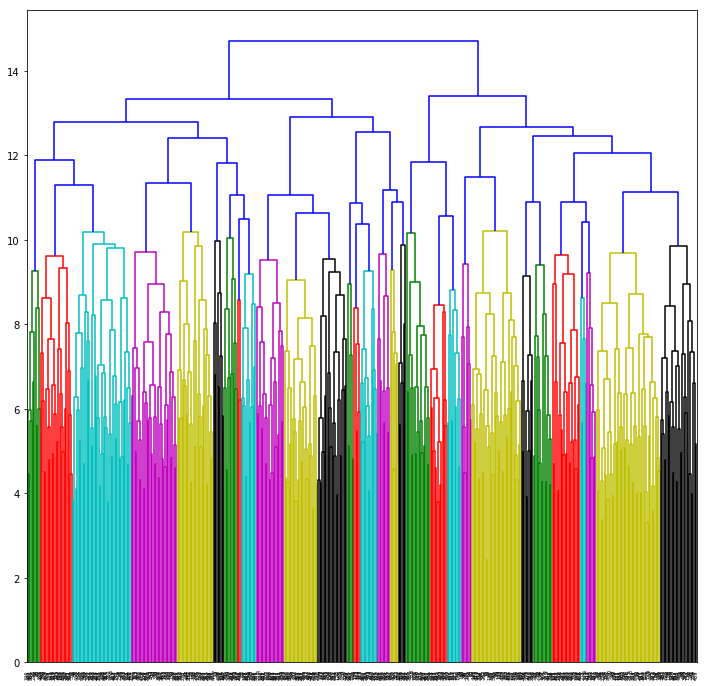

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
Xc = X[:500]
Z = linkage(Xc,'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Let's see. I can either have 30 differernt groups (if I partition ech group by when it becomes a blue line) or, I prefer to have 13 groups if we group together some of those. I don't know how to explain which 13 I've chosen, but with 500 different entries I chose 13.

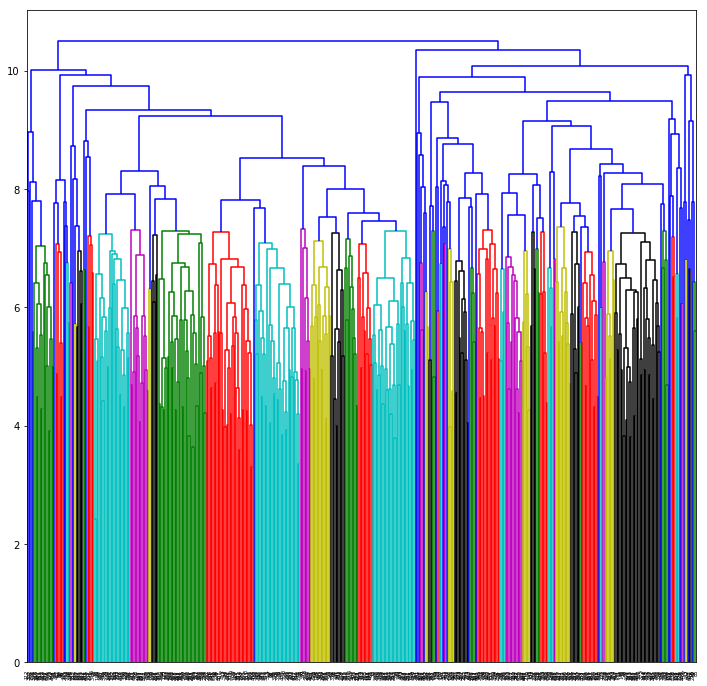

In [28]:
Xc = X[:500]
Z = linkage(Xc,'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Average just seems stupid.Like really stupid. I have no idea what information someone would gain from that image haha! Let me try reducing the number of entries.

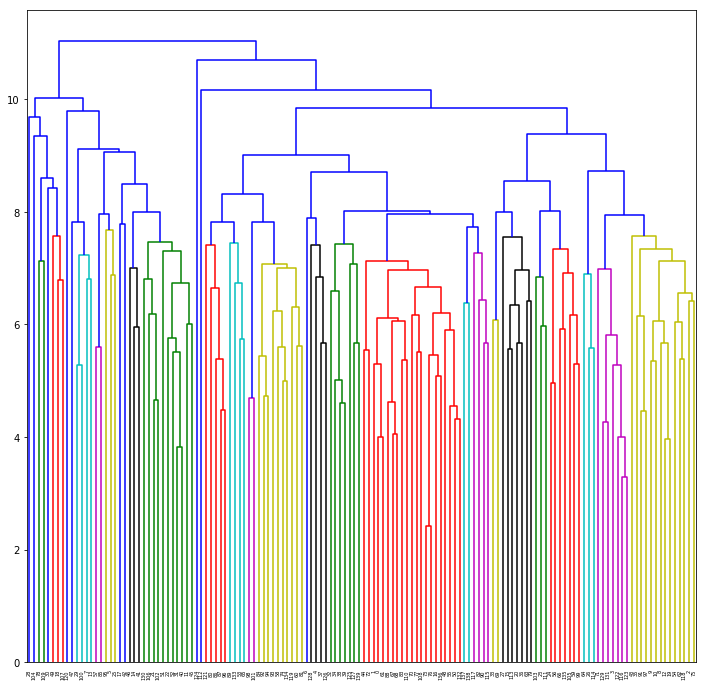

In [30]:
Xc = X[:140]
Z = linkage(Xc,'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

So there is still some general shape consistency, but thank goodness it actually seems more clear. What this tells me is that, for example, if the number 6 was that mustard color, then there are 2 major ways to determine if something is a 6, and then two other minor ways that also show us a 6.

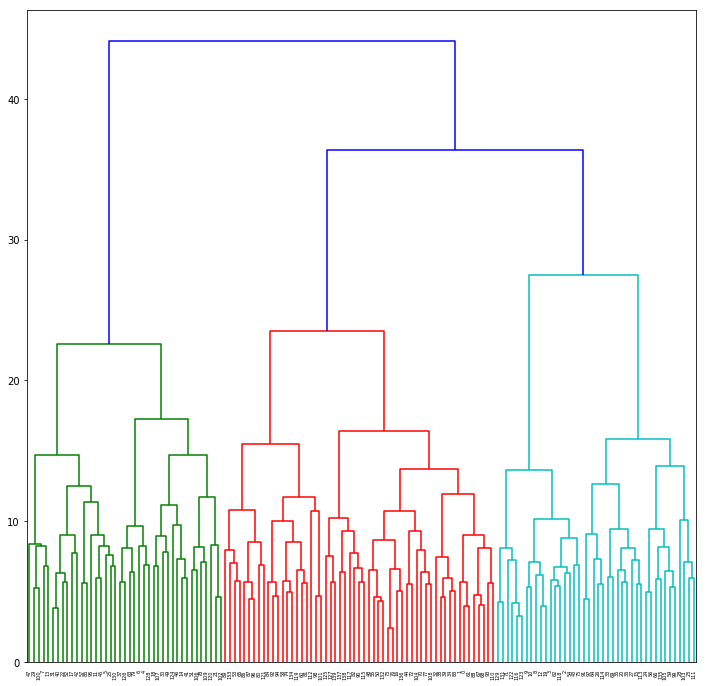

In [31]:
Xc = X[:140]
Z = linkage(Xc,'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Well hot dang. That is CLEAN. I really am liking that. It shows us that there are 6 different SOLID clusters. I think I will always use ward when my data is fiesty. However, it doesn't seem to show which number belongs in which cluster.